## トヴェルスキー＝カーネマンによるタクシーの問題

トヴェルスキーとカーネマンは人間が確率的判断を不得意とする事例として次の問題を提起した．

> タクシーの問題：ある街でタクシーによるひき逃げ事件が発生した．
目撃者の証言によると「ひき逃げしたタクシーは青色」であった．
その証言の信憑性を，事故時と同じ状況下で確認したところ（目撃者は必ずどちらかと答えるものとする），
青色タクシーでも緑色タクシーでも80%の確率で正しく色を識別できた．
証言通り，青色タクシーがひき逃げした確率はどれだけだろうか？
なお，この街では（タクシーの車体の色は緑色タクシーと青色タクシーしかなく）
タクシー総数の85%が緑色，15%が青色である．

この問題は逆確率の問題あるいはベイズ確率の応用として通常は説明される．
ベイズ確率の計算式とは条件付き確率記号 $P(A|B)$ （Bが起こった場合にAの起こる確率）を用いると
$$
P(B|A) = \frac{P(A|B)P(B)}{P(A|B)P(B)+P(A|\bar{B})P(A|\bar{B})}
$$
として説明される．

この問題を以下のように整理する．

- 「目撃者の証言＝青色タクシーと証言したときに青色タクシーである」，その確率 $P(B|A)$を得たい
- 青色タクシーの割合$P(B)=0.15$，緑色タクシーの割合$P(\bar{B})=0.85$
- 青色タクシーを青と証言 ($P(A|B)=0.8$)
- 緑色タクシーを緑と証言 ($P(\bar{A}|\bar{B})=0.8$) 
- 必ずいずれかを証言するので緑色タクシーを青色タクシーと証言$P(A|\bar{B})=0.2$を補う

すると
$$
P(B|A) = \frac{0.8\times 0.15}{0.8\times 0.15+0.8\times 0.85}
= 0.41\dots
$$
と計算できて，目撃者の証言はあまり当てにならないことがわかる．

何が私たちを誤認させたのだろうか．
カーネマンらは，私たちは問題とする事象の存在確率（ここでは青色タクシーの割合0.15）を無視しがちであることが大きな原因であると指摘した．
次のRプログラムで，いくつかの比率を変えて試してみよう．

In [1]:
# Pb=P(B),Pab=P(A|B)
Pb <- 0.01
Pab <- 0.99
# Pba=P(B|A)
Pba <- (Pab*Pb)/(Pab*Pb+(1-Pab)*(1-Pb))
Pba

[1] 0.5

Rにはモザイクプロットという図示機能がある．
これを使って図示してみよう．
右上が青色タクシーの証言に青色タクシーである場合，左上が青色タクシーの証言に緑色タクシーである場合になる．
上で計算した逆確率は，この2つの和に対して右上の割合を計算していることになる．

0.19,0.76
0.04,0.01


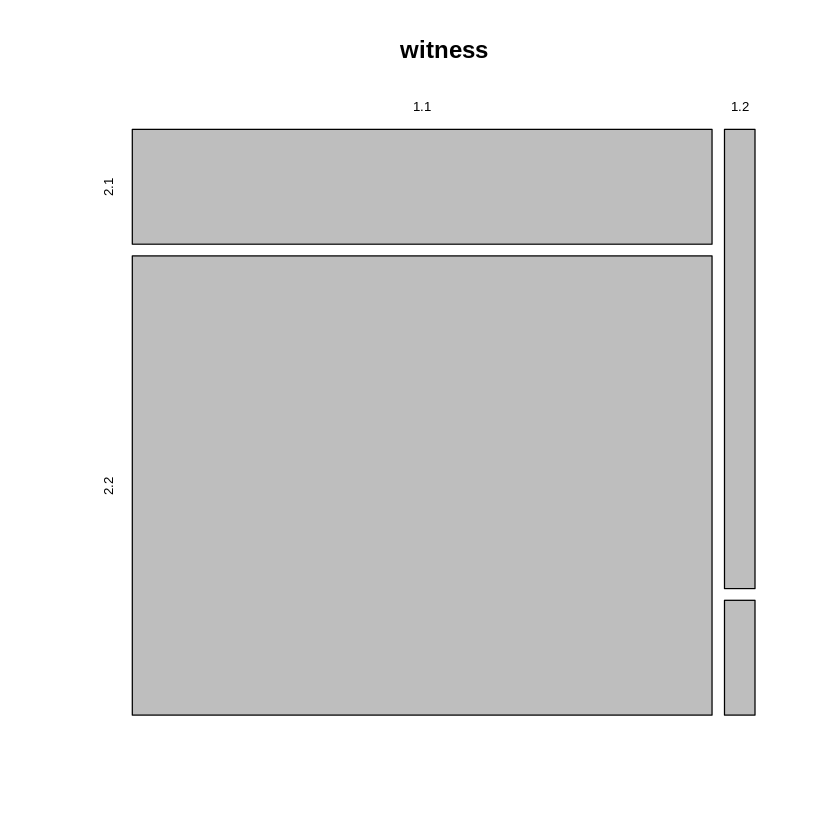

In [2]:
# 青色タクシーの割合
Pgb <- 0.05
GB <- c(1-Pgb,Pgb)
# 証言の精度
# 青Blueの証人
Bwitness <- c(0.8,0.2)
# 緑Greenの証人
Gwitness <- c(0.2,0.8)
# モザイクプロットにわたす行列を作成
# GB*Gwitness, GB*BwitnessはRによるベクトルの成分ごとの積
witness <- matrix(c(GB*Gwitness, GB*Bwitness),2)
witness
mosaicplot(witness)

たとえばインフルエンザの検査で偽陽性の場合に，実際に陽性である確率では，検査が正しく判定する確率を目撃の精度に，青色タクシーの割合を罹患率に置き換えれば，同様にして計算できる．
この観点から，2020年からのパンデミックで話題のPCR検査についても多くの記事を見つけることができる．
たとえば [PCR検査の精度を論じたブログ](https://www.yushoukai.org/blog/pcr)
がある．

ベイズ確率を用いた推定法であるベイズ推定は，現在の人工知能技術の中でも最も多く使われている方法の一つである．
しかし，膨大なデータにもとづき計算の修正を繰り返す実際の応用では，この例のように「単純な確率よりも必ず小さくなる」のようなことが言えるわけではない．
